# 01 - Neural Network Regression with TensorFlow

**Content of this notebook :**
- Architecture of a regression model
- Input shapes and output shapes
    - `X`: features/data (inputs)
    - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
    - Creating a model
    - Compiling a model
        - Defining a loss function
        - Setting up an optimizer
        - Creating evaluation metrics
    - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
    - Visualizing the model 
    - Looking at training curves
    - Compare predictions to ground truth
- Saving a model
- Loading a model

In [1]:
# import tensorfow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
#  import numpy 
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

## What is a regression problem?

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, we might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms...).
- Predict coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

## Typical architecture of a regression neural network

The word typical is on purpose. Why?

Because there are many different ways to write neural networks. But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

| **Hyperparameter** | **Typical Value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually ReLU (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | MSE (mean squar error) or MAE (mean absolute error) ... |
| Optimizer | SGD (stochastic gradient descent), Adam ... |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

> **Note**: A **hyperparamter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own.

## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data to model.

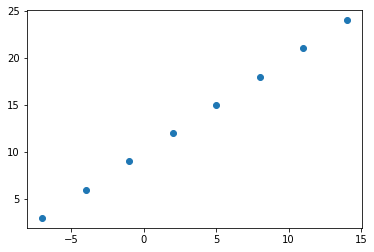

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

Before we do any modelling, can we calculate the pattern between `X` and `y` ?

For example, based on this data what the `y` value if `X` is 17.0? Or if `X` is -10.?

### Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

- The **input shape** is the shape of your data that goes into the model.
- The **output shape** is the shape of your data we want to come out of the model.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before we created data using NumPy arrays, but we could do the same with tensors.

In [4]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

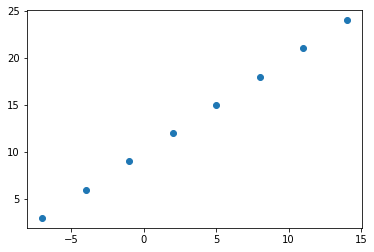

In [5]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,y)

Our goal here will be to use `X` to predict `y`. So our **input** will be `X` and our **output** will be `y`.

What is the shape of our input and output?

In [6]:
# Take a single example of X
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
# Single example of our dataset
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

Our dataset is only 2 small lists of numbers, so each example is a scalar with a rank 0.

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `-3.0`. We are trying to use one X value to predict one y value.

<center><img src="images/01-input-and-output-shapes-housing-prices.png" width=600px></center>

*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learninng).
2. **Compiling a model** - defining how a model performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3 **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the `Keras Sequential API` to build a model for our regression data.

> **Note**: if you're using TensorFlow 2.7.0+, the `fit()` function no longer upscales input data to go from `(batch_size,)` to `(batch_size,1)`. To fix this, we need to expand the dimension of input data using `tf.expand_dims(input_data,axis=-1)`.

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute error
              optimizer = tf.keras.optimizers.SGD(), # SQG is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 497ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [18]:
# Other way to write the model

# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 194ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [19]:
# Check out X and y
X,y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Try and make a prediction using the model
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

It doesn't go very well for the prediction. IT should've output something close to 27.0.

## Improving a model

How can we improve the model?

To improve the model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - Here you might want to add more layers, increase the number of hidden units within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want te choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** or on more data.

<center><img src="images/02-improving-a-model-from-model-perspective.png" width=650px></center>

In [24]:
# Add more epochs to our model

tf.random.set_seed(42)

# create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit
model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 648ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

We notice the loss value decrease from before (and keep decreasing as the number of epochs get higher).

In [25]:
# Make a new prediction with the new model
y_pred = model.predict([17.0])
y_pred

array([[30.158512]], dtype=float32)

The result is much better. Now we need to evaluate the model.

### Exercice : Try other changes to improve the model

In [60]:
# Add more layers to the model and see if the prediction is improved
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 603ms/step - loss: 12.3203 - mae: 12.3203
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1611 - mae: 11.1611
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9503 - mae: 9.9503
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6481 - mae: 8.6481
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2624 - mae: 7.2624
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2141 - mae: 7.2141
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1656 - mae: 7.1656
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1167 - mae: 7.1167
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0674 - mae: 7.0674
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0178 - mae: 7.0178
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss:

In [61]:
y_pred = model.predict([17.0])
y_pred

array([[14.918866]], dtype=float32)

In [62]:
# change the optimizer 

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 678ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0548 - mae: 11.0548
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6048 - mae: 10.6048
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1548 - mae: 10.1548
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7048 - mae: 9.7048
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.2548 - mae: 9.2548
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.8048 - mae: 8.8048
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3548 - mae: 8.3548
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9048 - mae: 7.9048
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4548 - mae: 7.4548
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - lo

In [63]:
y_pred = model.predict([17.0])
y_pred

array([[27.401552]], dtype=float32)

In [64]:
# Let's see another change to improve our model


# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit
model.fit(tf.expand_dims(X,axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 539ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 10ms/step 

In [65]:
y_pred = model.predict([17.0])
y_pred

array([[31.941305]], dtype=float32)

As we can see making some changes on our model can improve the result. Adding more layers or training our model on more epochs improved the result on the loss of our model. We can see that changing also the optimizer by using Adam improved a lot the model with a loss close to 0.6 and a prediction close to 27.

However we can see in the examples that even if the loss is improved in some models, the result is still not close to 27. It means that maybe our model is overfitting on our training data. It is learning the patterns between X and y far too well. So when it sees a new x, it's just relating it back to what is knows and the error that it's producing during training is not a really valid representation.

Now we have trained the model, we need to evaluate it!

## Evaluating a model